<a href="https://colab.research.google.com/github/Jashkine/RAG_Pipeline/blob/main/Workbook_Introduction_to_RAGs_Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction to Retrieval Augmented Generation (RAG)

## Traditional GenAI Chatbot Flow:

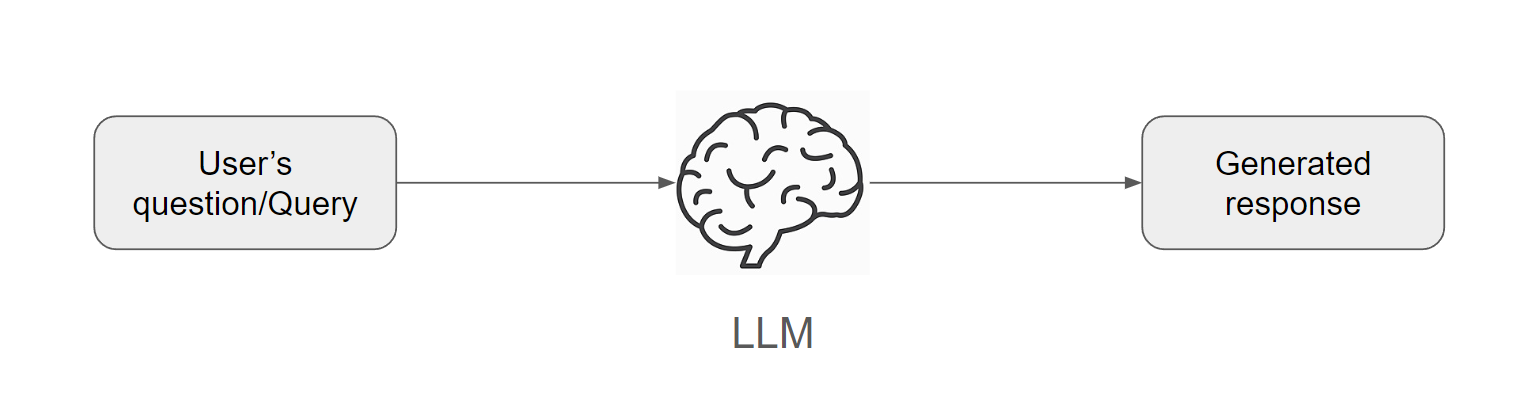

### What is RAG?

Retrieval Augmented Generation (RAG) is a method that improves the accuracy of large language models by providing them with external knowledge at the time of inference. Instead of relying entirely on the model's internal parameters (which may generate hallucinations or incorrect responses), RAG allows the model to retrieve relevant information from external sources, like documents or databases, and use that to provide more factual and context-aware responses.

### Why does it matter?

- **Hallucinations**: Language models may generate information that sounds plausible but is factually incorrect. This is known as a *hallucination*.
- **How RAG Helps**: By using RAG, we reduce the chances of hallucinations by grounding the model's responses in external knowledge, such as specific documents or databases.

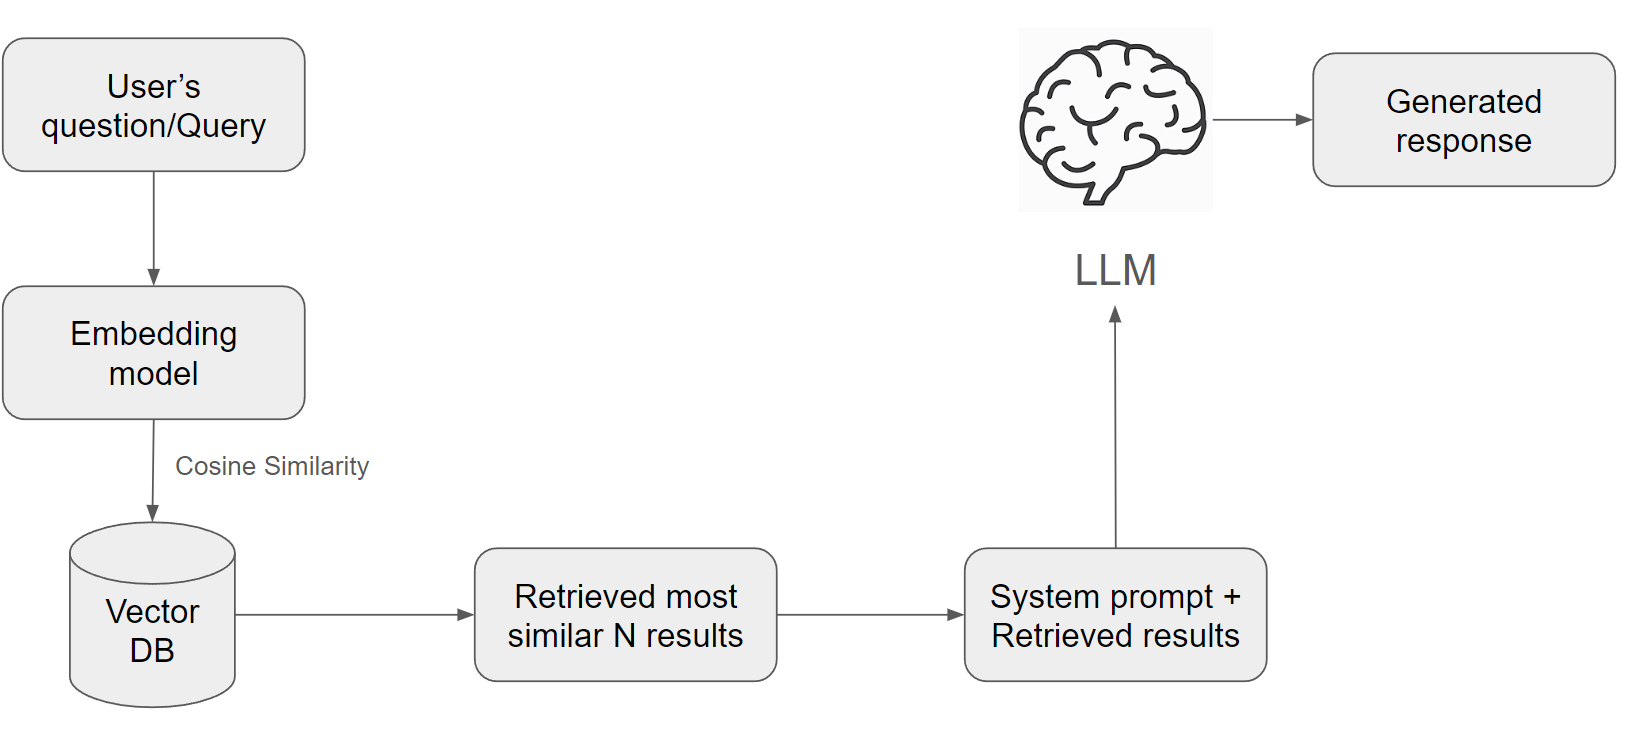

### High-level overview of RAG process:

1. **Query Input**: The user asks a question.
2. **Retriever**: The system retrieves the most relevant documents from a knowledge base.
3. **Augmentation**: The retrieved documents are appended to the model's prompt.
4. **Generation**: The model generates a response using both the original query and the provided context.

In the following sections, we will cover all the necessary theory and steps to implement our first RAG-based system.


# 2. What Are Text Embeddings?

Text embeddings are numerical representations of words, sentences, or documents in a continuous vector space. The goal is to capture semantic relationships between words, meaning that similar words or phrases should be close to each other in the vector space.

![](https://media.licdn.com/dms/image/v2/D5612AQFr62iAflv8Bw/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1712407745945?e=2147483647&v=beta&t=Ls_Bw3sFU9xQRgrvB4essemMgsEX9jmAeYWN6f10N64)
Source: https://www.linkedin.com/pulse/how-do-embeddings-work-large-language-model-llm-onfinanceofficial-54awc/

### Types of Text Embeddings:

1. **Word Embeddings**: These represent individual words as vectors. Examples include Word2Vec and GloVe.
2. **Sentence Embeddings**: These represent entire sentences or phrases as a single vector.
3. **Document Embeddings**: These represent entire documents or passages as a single vector.

The beauty of embeddings is that they allow us to compare texts in a mathematical way. Texts with similar meanings will have similar vectors.

![](https://arize.com/wp-content/uploads/2022/06/blog-king-queen-embeddings.jpg)
Source: https://arize.com/blog-course/embeddings-meaning-examples-and-how-to-compute/


# 3. Deterministic Website Chatbot for F&Q

Before we jump into RAG and embeddings, let's first understand the limitations of traditional deterministic chatbots. These bots follow strict rules and usually present a pre-defined set of questions and answers.

### Problem with Deterministic Chatbots:
- Users can only select from predefined questions.
- If a user asks a question that doesn’t exactly match the pre-defined ones, the bot fails.

### Example Code: Simple FAQ Chatbot with Predefined Questions




In [ ]:
faq_database = {
    "What is your return policy?": "Our return policy allows customers to return products within 30 days of purchase. Items must be in their original condition and packaging. To initiate a return, visit our return portal and provide your order number and email address.",

    "How do I track my order?": "You can track your order by using the tracking number provided in the shipment confirmation email. Alternatively, you can log in to your account and go to the 'Order History' section to find the tracking link.",

    "What payment methods do you accept?": "We accept all major credit cards (Visa, MasterCard, American Express), PayPal, and Apple Pay. For corporate accounts, we also offer invoicing options. Please contact support for more information on setting up a corporate account.",

    "Can I change or cancel my order after it’s been placed?": "Once an order has been placed, we are unable to modify it directly. However, you can cancel your order within the first hour of placing it through the 'My Orders' section of your account. After that, you’ll need to wait for the order to be delivered and then initiate a return.",

    "What are your shipping options?": "We offer standard, expedited, and overnight shipping. Standard shipping takes 5-7 business days, while expedited shipping takes 2-3 business days. Overnight shipping ensures delivery by the next business day. International shipping options are also available, with delivery times varying by destination.",

    "How do I reset my account password?": "To reset your password, go to the login page and click on 'Forgot Password'. You will receive an email with instructions to reset your password. If you don't see the email, check your spam folder or contact customer support for help.",

    "Do you ship internationally?": "Yes, we ship to select international destinations. International shipping costs and delivery times vary depending on the destination. You can calculate the shipping costs at checkout after providing your address.",

    "What do I do if I receive a damaged or defective product?": "If you receive a damaged or defective product, please contact our customer support within 48 hours of receiving the item. We will provide instructions on how to return the product or arrange for a replacement. Make sure to include photos of the damaged item and packaging for faster processing.",

    "How do I contact customer support?": "You can contact our customer support via email at support@ourcompany.com, or by calling our support line at 1-800-123-4567 during business hours (9 AM to 5 PM, Monday to Friday). We also offer live chat support on our website.",

    "Can I use multiple discount codes on a single order?": "No, our system only allows one discount code per order. However, you can apply store credit or a gift card in addition to a discount code at checkout.",

    "How do I update my shipping address after placing an order?": "If your order has not yet been processed, you can update your shipping address by logging into your account and navigating to the 'My Orders' section. If the order has already been processed or shipped, you will need to contact customer support to discuss possible options.",

    "What should I do if I never received my order?": "If your order has not arrived by the estimated delivery date, first check the tracking information. If the tracking shows the item was delivered but you didn't receive it, contact customer support so we can investigate and resolve the issue.",

    "Do you offer gift wrapping?": "Yes, we offer gift wrapping for an additional fee. You can select the gift wrapping option at checkout, and you can also include a personalized message with the gift.",

    "Can I return a product after 30 days?": "Unfortunately, returns are only accepted within 30 days of the purchase date. If you have extenuating circumstances, please contact customer support to discuss possible exceptions on a case-by-case basis.",

    "What are your business hours?": "Our customer support team is available from 9 AM to 5 PM, Monday through Friday, excluding holidays. Our website is available for orders 24/7.",

    "How do I subscribe to your newsletter?": "To subscribe to our newsletter, scroll to the bottom of our homepage and enter your email in the subscription box. You’ll receive exclusive offers, product updates, and company news directly to your inbox.",

    "What is your warranty policy?": "We offer a one-year warranty on all our products. The warranty covers manufacturing defects but does not cover damage caused by misuse, accidents, or normal wear and tear. To file a warranty claim, contact our customer support team with your order details and a description of the issue.",

    "How can I become a reseller of your products?": "We welcome reseller partnerships! If you're interested in becoming a reseller, please contact our sales team at sales@ourcompany.com with details about your business, and we’ll get back to you with more information.",

    "Do you offer student discounts?": "Yes, we offer a 10% discount for students. To get the discount, sign up with your valid student email, and we will verify your status. After verification, you will receive a unique discount code to use at checkout.",

    "Can I expedite the shipping of my order?": "Yes, you can select expedited or overnight shipping at checkout. Expedited shipping typically takes 2-3 business days, while overnight shipping ensures delivery by the next business day. Please note that expedited shipping costs more than standard shipping."
}

In [ ]:
x

In [ ]:
def deterministic_chatbot(question):
    # TODO: Implement this function -> It should print the result, if found in the faq database, if not write a negative message

In [ ]:
# Example usage
print(deterministic_chatbot("How do I track my order?"))
print(deterministic_chatbot("What are your shipping options?"))

You can track your order by using the tracking number provided in the shipment confirmation email. Alternatively, you can log in to your account and go to the 'Order History' section to find the tracking link.
We offer standard, expedited, and overnight shipping. Standard shipping takes 5-7 business days, while expedited shipping takes 2-3 business days. Overnight shipping ensures delivery by the next business day. International shipping options are also available, with delivery times varying by destination.


As you can see, the chatbot can only respond to questions it has been explicitly programmed for.


---


# 4. Introduction to OpenAI Embeddings API

To overcome the limitations of deterministic chatbots, we can use embeddings to find semantically similar questions and provide relevant answers, even if the exact question was not pre-defined.

### What is the OpenAI Embeddings API?

The OpenAI Embeddings API allows us to convert any text (word, sentence, or document) into a vector representation. We can then use these vectors to find similar questions or phrases by measuring their distance in vector space.

### Let's Encode Our First Example!




In [ ]:
!pip install openai

In [ ]:
import openai

In [ ]:
client = False

In [ ]:
query = "How do I track my order?"

In [ ]:
# TODO: Getting the embedding

In [ ]:
# TODO: Extracting the embedding vector



# 5. Finding Similar Questions

Now that we know how to generate embeddings, we can build a system to find the most similar question to a user query. This is the foundation for RAG-based systems.



### Distance Metrics:

To find similar questions, we compute the **cosine similarity** between vectors. The closer the cosine similarity is to 1, the more similar the two vectors are.

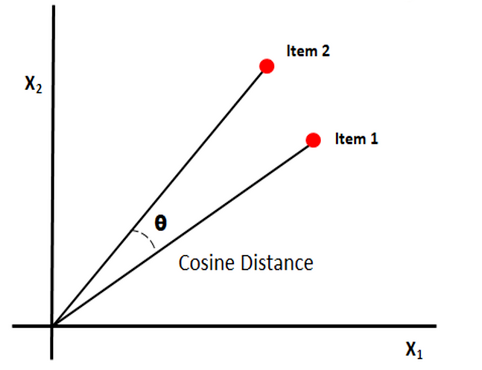

![](https://miro.medium.com/v2/resize:fit:1400/1*LfW66-WsYkFqWc4XYJbEJg.png)

In [ ]:
import numpy as np

In [ ]:
def embedding_model(query, openai_client, model="text-embedding-3-small"):
  # TODO: Implement the function that calculates and returns an embedding


In [ ]:
def cosine_similarity(vec1, vec2):
    # TODO: Implement cosine similiarity using numpy only


In [ ]:
vector_database = {}

for q in faq_database:
  vector_database[q] = embedding_model(q, client)

In [ ]:
def find_most_similar_faq(query, faq_vector_db, openai_client):
    # Step 1: Generate an embedding for the user's query
    query_embedding = False

    # Step 2: Initialize variables to track the best match
    best_match = False
    highest_similarity = False

    # Step 3: Compare query embedding with each FAQ embedding using cosine similarity
    for faq_question, faq_embedding in faq_vector_db.items():
        similarity = False
        if False:
            best_match = faq_question
            highest_similarity = similarity

    return best_match

# Example usage
user_query = "Can I return a product after 30 days?"
best_match = find_most_similar_faq(user_query, vector_database, client)
print(f"The most similar FAQ to your query is: '{best_match}'")



# 6. Building a Simple Chatbot using OpenAI API

Now that we can encode questions and find similar ones, let's build a basic chatbot that uses OpenAI's API to answer questions dynamically.



In [ ]:
import openai

In [ ]:

system_prompt = {
                    "role": "system",
                    "content": f"""
                    You are a helpfull E-Commerce assistant helping customers with their general questions regarding policies and procedures when buying in our store.
                    Our store sells e-books and courses for IT professionals.
                    """,
                }

In [ ]:
def simple_chatbot(messages, openai_client, model="gpt-4o"):
    # TODO: Implement simple chatbot

In [ ]:
# Example query
query = "What is your return policy?"

user_query = {"role":"user", "content":query}
messages = [system_prompt, user_query]
response = simple_chatbot(messages, client)
print(f"Bot: {response}")


# 7. Upgrading Chatbot: Retrieval-Augmented Generation (RAG) **First RAG Chatbot 🎉**

Let's upgrade our chatbot by using both OpenAI's API and a vector database. Now, we will:
1. Retrieve the most similar FAQ using embeddings.
2. Use that FAQ as context to the model's prompt.
3. Generate an answer based on the retrieved context and the original question.




In [ ]:
import openai
import numpy as np

In [ ]:
# Cosine similarity function (reused)
def cosine_similarity(vec1, vec2):
  return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

def embedding_model(query, openai_client, model="text-embedding-3-small"):
  # Getting the embedding
  response = openai_client.embeddings.create(
      model=model,
      input=query
  )

  embedding = response.data[0].embedding
  return embedding

# Function to find the most similar FAQ to the user's query
def find_most_similar_faq(query, faq_vector_db, openai_client):
    # Step 1: Generate an embedding for the user's query
    query_embedding = embedding_model(query, openai_client)

    # Step 2: Initialize variables to track the best match
    best_match = None
    highest_similarity = -1

    # Step 3: Compare query embedding with each FAQ embedding using cosine similarity
    for faq_question, faq_embedding in faq_vector_db.items():
        similarity = cosine_similarity(query_embedding, faq_embedding)
        if similarity > highest_similarity:
            best_match = faq_question
            highest_similarity = similarity

    return best_match

def get_answer(question, database):
  return database[question]

In [ ]:
def prompt_builder(system_message, context):
  return system_message.format(context)

In [ ]:

system_prompt = {
                    "role": "system",
                    "content": """
                    You are a helpfull E-Commerce assistant helping customers with their general questions regarding policies and procedures when buying in our store.
                    Our store sells e-books and courses for IT professionals.

                    Only answer based on the context!

                    Context: {}
                    """,
                }

In [ ]:
def rag_chatbot(query, vector_database, faq_database, openai_client):
    # Step 1: Encode the query
    query_embedding = False

    # Step 2: Find the most similar FAQ using cosine similarity
    best_match = False
    best_answer = False

    # Step 3: Combine the context (best match) with the query
    augmented_prompt = False

    messages = False

    # Step 4: Use OpenAI API to generate a response with context
    response = openai_client.client.chat.completions.create(
      model="gpt-4o",
      messages=messages,
      max_tokens=250
    )

    return response.choices[0].text

In [ ]:
# Example query
query = "Can I return an item?"
response = rag_chatbot(query, vector_database, faq_database, client)
print(f"Bot: {response}")


TypeError: rag_chatbot() missing 3 required positional arguments: 'vector_database', 'faq_database', and 'openai_client'

# 8. Where to Store Embeddings?


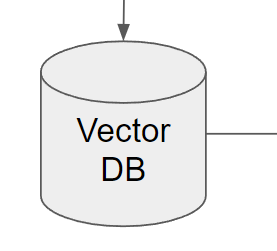


Embeddings need to be stored in a way that allows for fast similarity searches. There are a few options:

1. **In-Memory**: Suitable for small datasets, but not scalable.
2. **Databases**: SQL or NoSQL databases can store embeddings as plain vectors, but may not be optimized for vector search.
3. **Vector Databases**: Specialized databases like Pinecone, FAISS, or Milvus are designed for efficient vector search, using algorithms like Approximate Nearest Neighbors (ANN).

For larger-scale applications, we recommend using a vector database like **Pinecone**.


# 9. Introduction to Pinecone

Pinecone is a managed vector database that allows you to store and query embeddings efficiently. It provides a highly optimized environment for handling large datasets of embeddings and performing fast vector similarity searches.

### Steps to Set Up Pinecone:
1. Go to [Pinecone](https://www.pinecone.io) and create an account.
2. Set up a new project and create an index.
3. Save your API key for later use.

We will now integrate Pinecone into our chatbot to store and query FAQ embeddings.


# 10. Populating Pinecone with Embeddings

Now that we have Pinecone set up, we can start storing our FAQ embeddings for fast retrieval.




In [ ]:
!pip install pinecone

In [ ]:
import pinecone
from pinecone import Pinecone

In [ ]:
pinecone_clinet = False
index_name = "faq-embeddings"

In [ ]:
# Connecting to an Index
index = False

In [ ]:
# Populating the index with our FAQ database
data_to_upsert = []


index.upsert(data_to_upsert, namespace="ns1")

print(f"Uploaded {len(faq_database)} FAQ embeddings to Pinecone!")

Explanation:
1. Initialize Pinecone: You need to provide your API key and environment.
2. Create Index: An index is where your embeddings will be stored.
3. Upsert Data: We add (or update) the FAQ embeddings into Pinecone for efficient retrieval later.



# 11. Putting It All Together: First RAG with External Storage

We will now combine all the steps to build a chatbot that uses Pinecone to store and retrieve FAQ embeddings, and OpenAI to generate responses based on the user's query.



In [ ]:
import pinecone
import openai

In [ ]:
client = openai.OpenAI(api_key="YOUR_KEY")
pinecone_clinet = Pinecone(api_key="YOUR_API_KEY")
index_name = "faq-embeddings"
# Connecting to an Index
index = pinecone_clinet.Index(index_name)

In [ ]:
# Function to find the most similar FAQ in Pinecone
def retrieve_faq(query_embedding, index, top_k=1):
    # TODO: Implement retreival function from using Pinecone

In [ ]:
def rag_chatbot_with_pinecone(query, openai_client, index):
    # Step 1: Encode the query
    query_embedding = embedding_model(query, openai_client)

    # Step 2: Retrieve the most relevant FAQ from Pinecone
    best_match = retrieve_faq(query_embedding, index)

    # Step 3: Augment the query with context
    augmented_prompt = prompt_builder(system_prompt, best_match)

    messages = [{"role": "system","content": augmented_prompt},
                {"role": "user","content": query}]

    # Step 4: Use OpenAI to generate a response
    response = openai_client.client.chat.completions.create(
      model="gpt-4o",
      messages=messages,
      max_tokens=250
    )

    return response.choices[0].text

In [ ]:
# Example usage
while True:
  query = input()
  response = rag_chatbot_with_pinecone(query)
  print(f"User: {query}")
  print(f"Bot: {response}")